<a href="https://colab.research.google.com/github/lmendezayl/uba-ldd-ic/blob/main/guias/soluciones/practica9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 9: Componentes principales

Preguntar
- 6.d, 6.e
- 2.c

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Para clustering
from sklearn.cluster import KMeans

In [6]:
url = 'https://raw.githubusercontent.com/lmendezayl/uba-ldd-ic/refs/heads/main/datasets/'

## Componentes Principales



### Ejercicio 1.



Dada la siguiente tabla de datos correspondientes a la longitud y el ancho de las tortugas pintadas

| Longitud | Ancho |
|----------|-------|
|   93     |  76   |
|   94     |  78   |
|   96     |  80   |
|  101     |  84   |
|  102     |  85   |
|  103     |  82   |
|  104     |  83   |
|  106     |  83   |




#### (a)

Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión. Estimar
la presencia de correlación entre las variables a partir de este gráfico


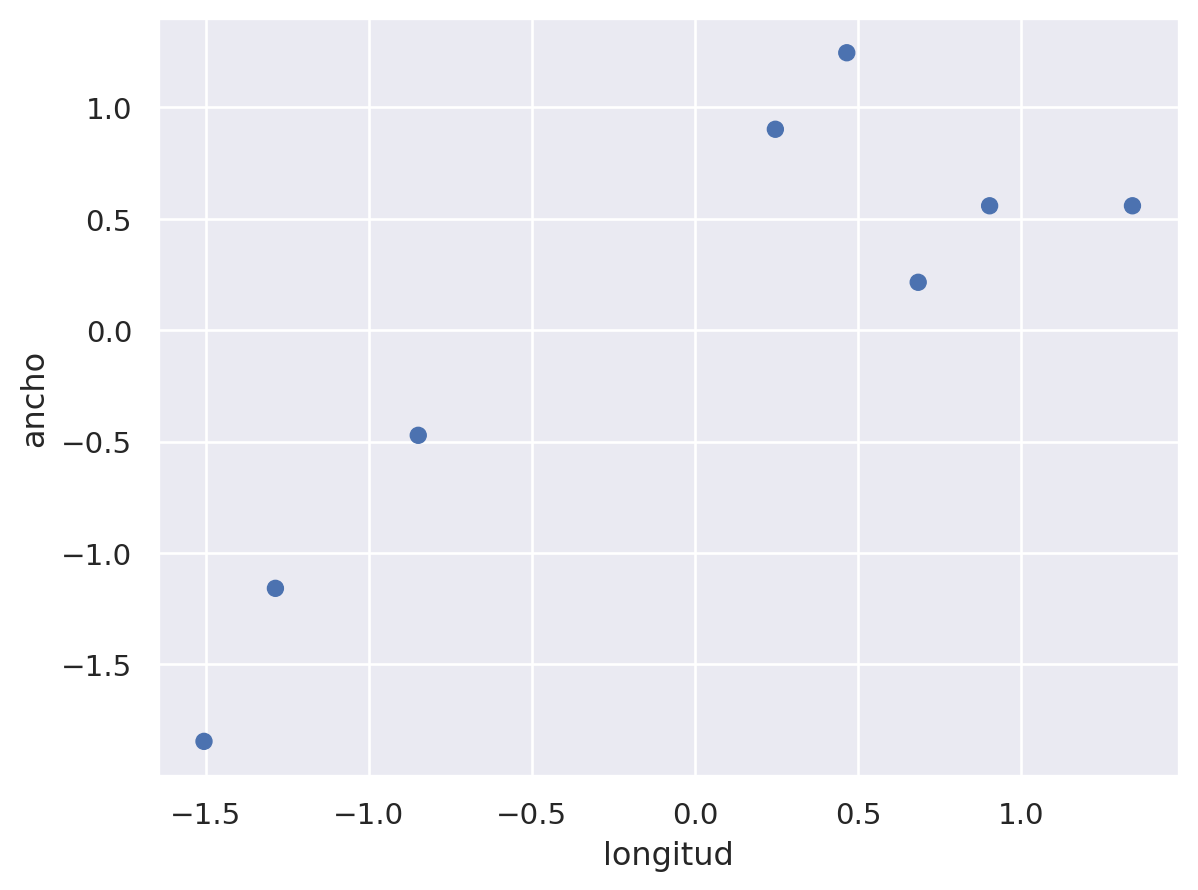

In [7]:
# creamos el dataframe
df = pd.DataFrame({
    'longitud': [93, 94, 96, 101, 102, 103, 104, 106],
    'ancho': [76, 78, 80, 84, 85, 82, 83, 83]})

# hacemos todo de una xD
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=['longitud', 'ancho'])
so.Plot(df.longitud, df.ancho).add(so.Dot())


#### (b)

Calcular la matriz de covarianzas y hallar sus autovalores y autovectores.


In [8]:
# X^T * X
corr = (df.T @ df) / len(df)
print(corr)

          longitud     ancho
longitud  1.000000  0.858572
ancho     0.858572  1.000000


In [9]:
gamma, U = np.linalg.eigh(corr)
# Los autovalores están ordenados de menor a mayor.
# Damos vueltas las columnas de la matriz de autovectores usando np.flip(-,1)
gamma = np.flip(gamma)
U = np.flip(U, 1)
print("Autovalores: ", gamma)
print("Autovector 1: ", U[0])
print("Autovector 2: ", U[1])

Autovalores:  [1.85857221 0.14142779]
Autovector 1:  [ 0.70710678 -0.70710678]
Autovector 2:  [0.70710678 0.70710678]



#### (c)

Hallar las componentes principales.


In [10]:
pca = PCA(n_components=2)
pca.fit(df)
print("Componentes principales: ", pca.components_)

Componentes principales:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]



#### (d)

Decidir si la información está mayormente representada en una de estas dos
componentes.


En teoría sí, pues el primer autovalor es mucho más mayor que el segundo autovalor. Lo cual indicaría que es más importante, y que su autovalor contiene más información


#### (e)

Indicar la proporción de la variabilidad explicada por cada una de ellas. ¿ A
que conclusión puede llegar?


In [11]:
# pca.explained_variance_ratio_ | Percentage of variance explained by each of the selected components.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
print("Varianza explicada por cada componente: ", pca.explained_variance_ratio_)

Varianza explicada por cada componente:  [0.92928611 0.07071389]


In [12]:
# lo que esta haciendo es esto
for i in range(pca.n_components):
    print("Variaza explicada por la componente ", i + 1, ": ", gamma[i] / sum(gamma))

Variaza explicada por la componente  1 :  0.9292861070281608
Variaza explicada por la componente  2 :  0.07071389297183911



### Ejercicio 2.



Sea
$$A =\begin{bmatrix}
3 & 1 & 1 \\
1 & 3 & 1 \\
1 & 1 & 5 \\
\end{bmatrix} $$

la matriz de covarianzas de una cierta muestra de datos cuya media es
cero.



#### (a)

Hallar los autovalores y autovectores de la matriz de covarianzas.


In [13]:
A = [[3, 1, 1],
    [1, 3, 1],
    [1, 1, 5]]

gamma, U = np.linalg.eigh(A)
gamma = np.flip(gamma)
U = np.flip(U, 1)

print("Autovalores: ", gamma)
print("Autovectores: ", U)

Autovalores:  [6. 3. 2.]
Autovectores:  [[ 0.40824829  0.57735027  0.70710678]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.81649658 -0.57735027  0.        ]]



#### (b)

Dar la expresión de las componentes principales $Z_1, Z_2, Z_3$ e indicar la  proporción de la variabilidad explicada por cada una de ellas.


In [14]:
pca = PCA(n_components=3)
pca.fit(A)
print("Componentes principales: ", pca.components_)
print("Varianza explicada por cada componente: ", pca.explained_variance_ratio_)

Componentes principales:  [[-2.35702260e-01 -2.35702260e-01  9.42809042e-01]
 [ 7.07106781e-01 -7.07106781e-01 -1.11022302e-16]
 [ 6.66666667e-01  6.66666667e-01  3.33333333e-01]]
Varianza explicada por cada componente:  [7.50000000e-01 2.50000000e-01 2.46519033e-33]



#### (c)

Hallar los *scores* de las primeras dos componentes principales correspondientes a la observación $x_1 = 2, x_2 = 2, x_3 = 1$ (es decir, los valores de $Z_1$ y $Z_2$ para dicha observación)


In [15]:
# ???? preguntar xD



### Ejercicio 3.



Implementar un programa que reciba como input un archivo de datos y un número $p_{acum}$ y devuelva la mínima cantidad de componentes principales que deben considerarse para que el porcentaje de varianza acumulada sea mayor o igual que $p_{acum}$.


In [16]:
def min_components(archivo, p_acum):
    if p_acum > 1 : raise ValueError("El valor de p_acum debe ser menor o igual a 1.")
    pca = PCA(n_components=len(archivo.columns))
    pca.fit(archivo)
    var_acum = 0
    varianzas = pca.explained_variance_ratio_
    for i in range(len(varianzas)):
        var_acum = sum(varianzas[:i])
        if var_acum >= p_acum: return f"Minima cantidad de CP tal que varianza acumulada mayor o igual a {p_acum}: {i}"

In [17]:
print(df)
min_components(df, 0.2)

   longitud     ancho
0 -1.505297 -1.845307
1 -1.286344 -1.158681
2 -0.848440 -0.472055
3  0.246321  0.901196
4  0.465273  1.244509
5  0.684226  0.214571
6  0.903178  0.557883
7  1.341082  0.557883


'Minima cantidad de CP tal que varianza acumulada mayor o igual a 0.2: 1'


### Ejercicio 4.



Considerando el archivo de datos `p8-chalets.csv` se pide:


In [18]:
chalets = pd.read_csv(url + 'p8-chalets.csv')
chalets.head()

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,1,8.7,0.3,3.1
1,2,14.3,0.9,7.4
2,3,18.9,1.8,9.0
3,4,19.0,0.8,9.4
4,5,20.5,0.9,8.3



#### (a)

Graficar los diagramas de dispersión de las variables de a pares. Estimar la presencia de correlación entre las variables a partir de estos gráficos.


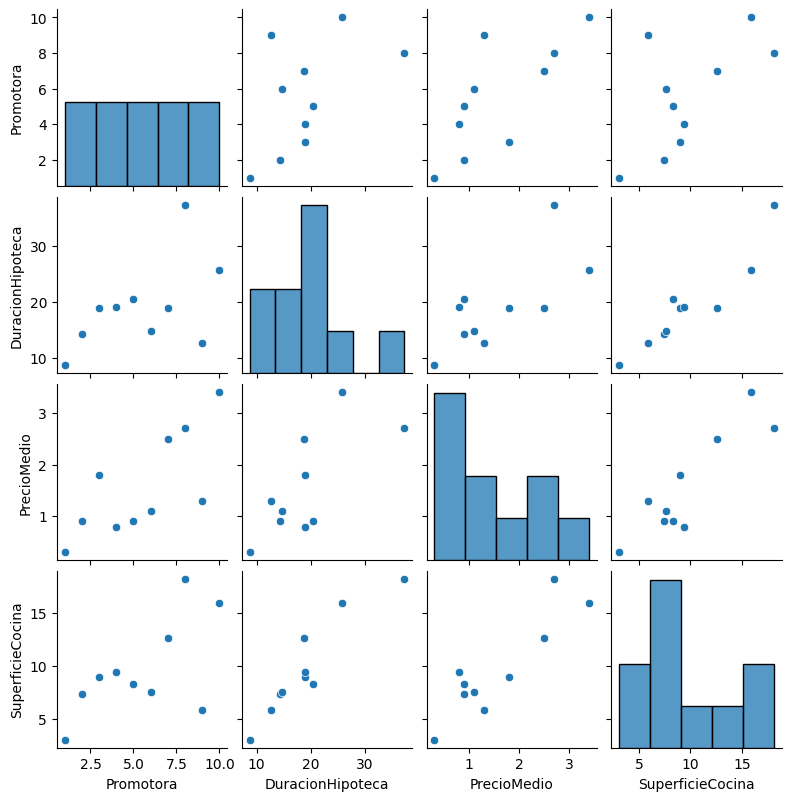

In [19]:
g = sns.pairplot(chalets)
g.fig.set_size_inches(8, 8)  # You can adjust the size (width, height) as needed
plt.show()


#### (b)

Calcular la matriz de covarianzas.


In [20]:
corr = np.cov(chalets)
print(corr)

[[ 14.49583333  23.01833333  29.5925      29.98333333  31.9025
   20.49833333  25.47416667  57.65083333  14.32666667  34.59166667]
 [ 23.01833333  37.59        47.795       48.6         50.65833333
   32.87666667  42.265       93.08166667  21.96333333  56.66      ]
 [ 29.5925      47.795       61.0425      61.91        65.0325
   41.955       53.2875     118.7875      28.38        71.775     ]
 [ 29.98333333  48.6         61.91        63.48        66.74333333
   43.86666667  55.39       121.45666667  30.95333333  74.66      ]
 [ 31.9025      50.65833333  65.0325      66.74333333  71.30916667
   46.79166667  57.47416667 127.96416667  34.53333333  78.25166667]
 [ 20.49833333  32.87666667  41.955       43.86666667  46.79166667
   31.65666667  38.75166667  83.66833333  24.60333333  52.70666667]
 [ 25.47416667  42.265       53.2875      55.39        57.47416667
   38.75166667  49.74916667 105.3925      27.66333333  66.54166667]
 [ 57.65083333  93.08166667 118.7875     121.45666667 127.96416


#### (c)

A partir de lo observado, resulta razonable pensar en un análisis de componentes principales para reducir la dimensión del problema?


Yesyeesssssss, tenemos una matriz de $R^{10 × 10}$ sino xD.


#### (d)

Hallar la primera componente principal.


In [21]:
# El escalado es importantisimo para garantizar que todas las variables tengan varianza 1.
# Sino, PCA me daba 91% cuando en realdiad era 81%.
chalets = StandardScaler().fit_transform(chalets)

# El maximo de componentes que puedo pedir son 4, porque solo tengo 4 variables (columnas)
pca = PCA(n_components=4)
pca.fit(chalets)

# Imprimimos el primer vector de las componentes (primer CP)
pca.components_[0]

array([0.44166807, 0.49466329, 0.52027983, 0.53809521])


#### (e)

Indicar qué porcentaje de variabilidad total logra explicar esta componente.


In [22]:
print(f"Variabilidad explicada por la primer componente: {round(pca.explained_variance_ratio_[0] * 100)}%")

Variabilidad explicada por la primer componente: 81%



### Ejercicio 5.



Considerar el dataset `p8-iris.txt`, que representa información del largo y ancho del pétalo y del sépalo de diversas muestras de flores de la especie Iris, la cual se puede distinguir en varias subespecies. Aplicar el programa del ejercicio anterior para determinar la menor cantidad de componentes principales necesarias para alcanzar un 90 % de variabilidad. Graficar los datos transformados que se obtienen luego de reducir variables.


In [23]:
iris = pd.read_csv(url + 'p8-iris.txt', sep='\t')
display(iris)

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
min_components(iris, 0.90)

'Minima cantidad de CP tal que varianza acumulada mayor o igual a 0.9: 1'

In [25]:
iris = StandardScaler().fit_transform(iris)
# queremos las primeras 2 componentes
pca = PCA(n_components=2)
# haciendo fit_transform modificamos la matriz
iris = pca.fit_transform(iris)
# imprimimos para ver a lo que me refiero
iris[:5,:5] # equivalente a head pero con lista

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

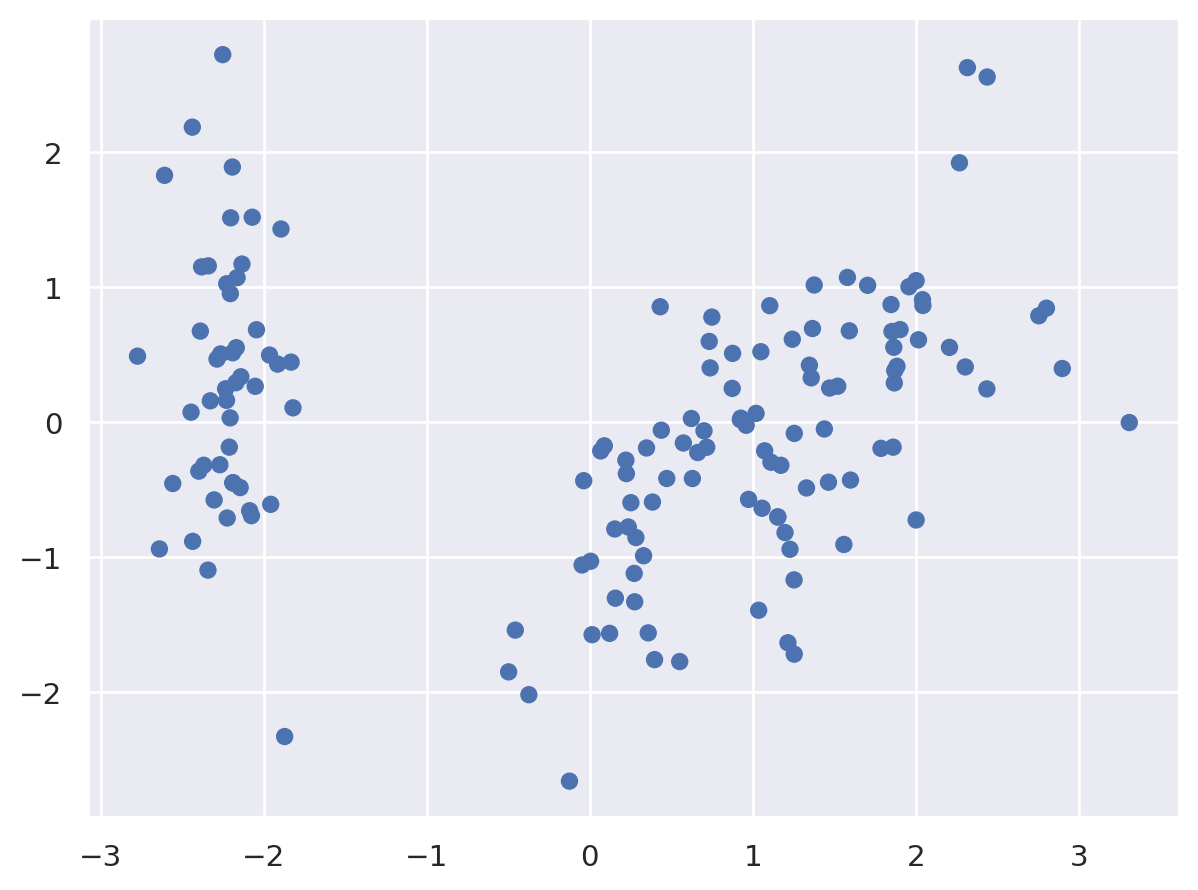

In [26]:
# graficamos
so.Plot(iris[:,0], iris[:,1]).add(so.Dot())

No entiendo como interpretar esto xd. Asumo que estan clusterizados, que es lo que queriamos, no?



---


Edit 1: En efecto, es lo que queriamos, podemos considerar que ganamos si son linealmente separables!


### Ejercicio 6.



Con el objetivo de obtener índices útiles para la gestión hospitalaria basados en técnicas estadísticas multivariantes descriptivas se recogió información del Hospital de Algeciras correspondiente a los ingresos hospitalarios del período 2007-2008. Se estudiaron las siguientes variables habitualmente monitorizadas por el Servicio Andaluz de Sald del Sistema Nacional de Salud Español:

NI: número de ingresos

MO: tasa de mortalidad

RE: tasa de egresos

NE: número de consultas externas

ICM: índice cardíaco máximo

ES: número de estancias

Las variables se midieron en un total de 22486 ingresos. En el archivo `p8-hospitales.csv` se aprecia la distribución de los valores obtenidos en las variables listadas por los servicios del
hospital de Algeciras. Como hay variables con distintos órdenes de magnitud, en el archivo `p8-hospitales-escalado.csv` se escalaron las variables a un mismo rango. Utilizando el archivo escalado:



#### (a)

Calcular las dos primeras componentes principales.


In [27]:
hospitales = pd.read_csv(url + 'p8-hospitales-escalado.csv')
hospitales.head()

,Servicio,NI,MO,RE,NE,ICM,ES
0,Cirugia,0.358385,0.304,0.244275,0.257901,0.564103,0.443958
1,Tocoginecologia,1.000000,0.024,0.221374,0.065260,0.008547,0.447995
2,Hematologia,0.000000,0.328,0.503817,0.356053,1.000000,0.082968
3,Cardiologia,0.040369,0.176,0.282443,0.000000,0.675214,0.160020
4,Digestivo,0.044879,0.472,0.229008,0.294376,0.470085,0.130156


In [28]:
hospitales.Servicio.unique()
columnas_numericas = hospitales.select_dtypes(include=np.number).columns
hospitales = hospitales[columnas_numericas]
hospitales.head()

,NI,MO,RE,NE,ICM,ES
0,0.358385,0.304,0.244275,0.257901,0.564103,0.443958
1,1.000000,0.024,0.221374,0.065260,0.008547,0.447995
2,0.000000,0.328,0.503817,0.356053,1.000000,0.082968
3,0.040369,0.176,0.282443,0.000000,0.675214,0.160020
4,0.044879,0.472,0.229008,0.294376,0.470085,0.130156


In [29]:
pca = PCA(n_components=2)
pca.fit(hospitales)
pca.components_[:2]

array([[ 0.70987656,  0.12902947, -0.21334877, -0.15119256, -0.48419142,
         0.42024809],
       [ 0.09388894,  0.52392663,  0.37011933,  0.54404102,  0.31628427,
         0.4285803 ]])


#### (b)

¿Qué porcentaje de variabilidad logra captar cada una de ellas?


In [30]:
pca.explained_variance_ratio_

array([0.39859472, 0.27335452])


#### (c)

¿Considera adecuado considerar dos componentes principales?


Habria que ver, pero no pareceria lo optimo.

In [31]:
pca = PCA()
pca.fit(hospitales)
pca.explained_variance_ratio_

array([0.39859472, 0.27335452, 0.20214085, 0.09136115, 0.02548667,
       0.00906209])

Minimo habria que tomar 3, veamos si superan al menos el 80%.

In [32]:
min_components(hospitales, 0.8)

'Minima cantidad de CP tal que varianza acumulada mayor o igual a 0.8: 3'


#### (d)

Hallar la correlación entre las nuevas variables y las originales (por medio de R²).


In [33]:
scores = pca.transform(hospitales)
scores


array([[ 0.14281444,  0.06040967, -0.20460046,  0.00715308,  0.11401373,
         0.06119552],
       [ 0.86685707, -0.31331282,  0.03769206,  0.31428276,  0.0289715 ,
        -0.04921251],
       [-0.54147388,  0.1719503 , -0.28184937,  0.10116837,  0.08111868,
        -0.11129112],
       [-0.24172728, -0.24924071, -0.36627606,  0.05183668,  0.03347786,
         0.06997087],
       [-0.14666936, -0.03103765, -0.17341659, -0.22072469, -0.17406367,
        -0.02443046],
       [ 0.71363325,  1.01279186, -0.11781694, -0.16736654, -0.02353018,
         0.01159735],
       [-0.34217044, -0.0909605 , -0.50177689, -0.02208026, -0.02596734,
        -0.07306698],
       [-0.21248087, -0.03004577,  0.43122608, -0.26888569, -0.0556937 ,
        -0.01528074],
       [-0.14432021, -0.20892222,  0.52200085, -0.29043363,  0.07529696,
        -0.04054889],
       [ 0.55843734, -0.36479119,  0.19944621,  0.10555735, -0.04431109,
        -0.06285223],
       [-0.62232912,  0.46940519,  0.47506545,  0.


#### (e)
¿Se obtienen las mismas conclusiones si se utiliza el archivo sin escalar?



### Ejercicio 7.



Se realiza un estudio sobre la calidad del agua en 4 ríos distintos del país. En el estudio se miden las concentraciones de 4 sustancias presentes en el agua, realizándose una medición por día durante los 365 días de un año. Los datos recolectados (generados artificialmente en este ejercicio) se encuentran en en el archivo `p8-calidad-agua.csv`. Cada columna representa una de las 4 variables medidas: $x_1, x_2, x_3,x_4$.


In [34]:
agua = pd.read_csv(url + 'p8-calidad-agua.csv')
agua.columns # que ganas de romper las pelotas con los whitespaces

Index(['x1', ' x2', ' x3', ' x4'], dtype='object')

In [41]:
agua

,x1,x2,x3,x4
0,0.01411,0.12445,1.04539,0.04318
1,-0.17200,1.01532,0.05276,-0.18680
2,1.03277,-0.00024,0.03330,-0.02765
3,0.06603,0.77159,-0.26459,0.05418
4,0.98548,0.06333,-0.03382,-0.09569
...,...,...,...,...
360,-0.09208,0.84087,-0.10243,-0.11231
361,-0.32223,-0.24897,1.13032,0.15636
362,1.15268,-0.17168,0.11728,-0.02610
363,0.94714,0.04118,-0.20791,-0.26628


In [35]:
agua = agua.rename(columns={' x2' : 'x2', ' x3' : 'x3', ' x4' : 'x4'})


#### (a)
Realizar un gráfico de dispersión de las variables $x_1, x_2$. ¿Cuántos clusters puede observar?


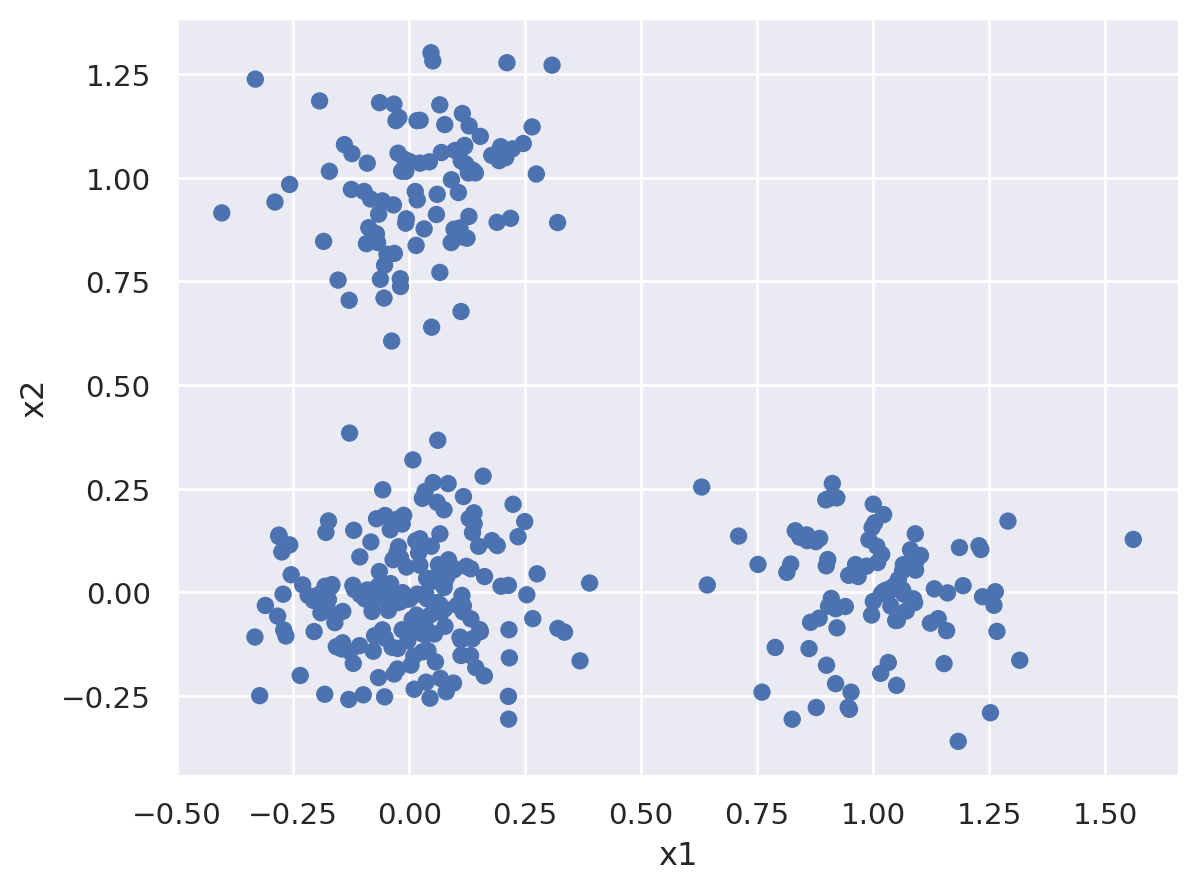

In [45]:
so.Plot(agua.x1, agua.x2).add(so.Dot())


#### (b)
Realizar un gráfico de dispersión de las variables $x_3, x_4$. ¿Cuántos clusters puede observar?


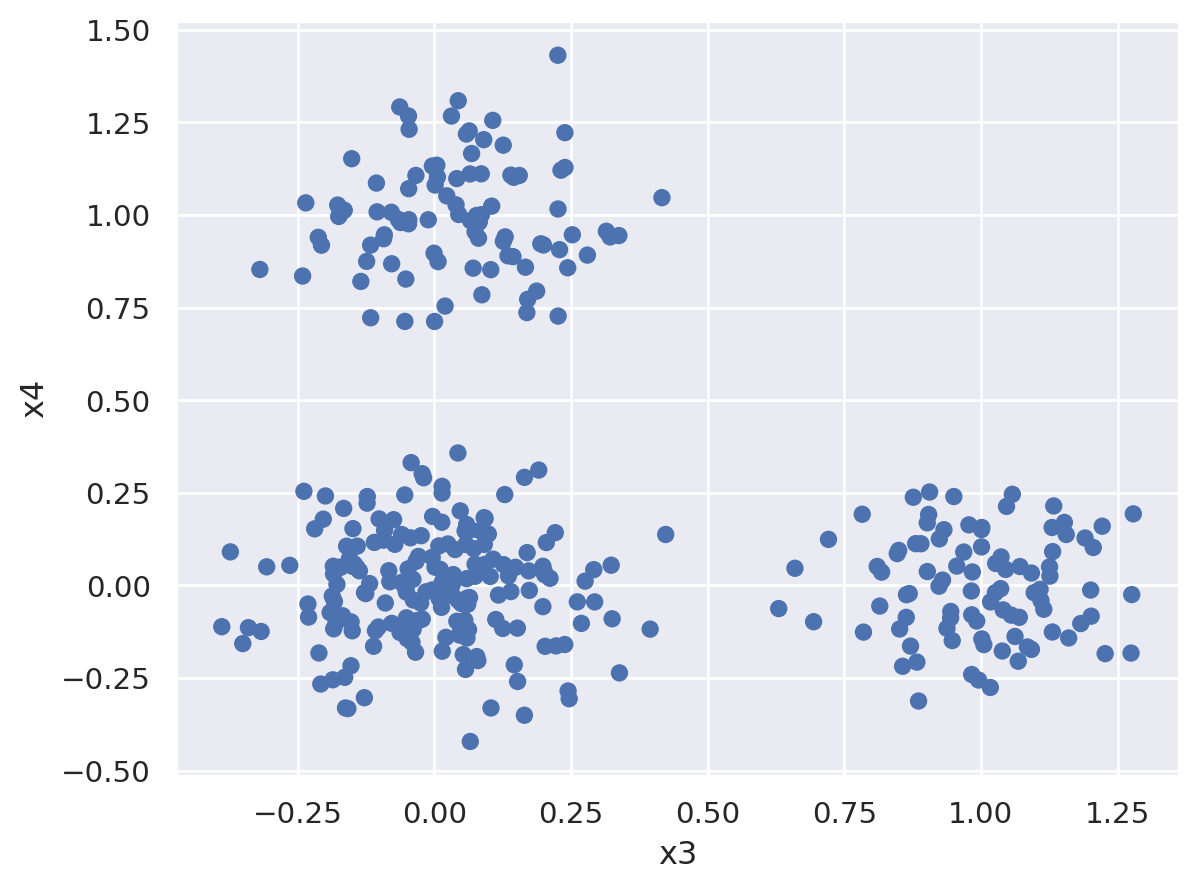

In [37]:
so.Plot(agua.x3, agua.x4).add(so.Dot())


#### (c)
Realizar la descomposición en componentes principales de los datos y realizar un gráfico de dispersión de las dos primeras componentes principales $Z_1$ y $Z_2$. ¿Cuántos clusters puede observar?


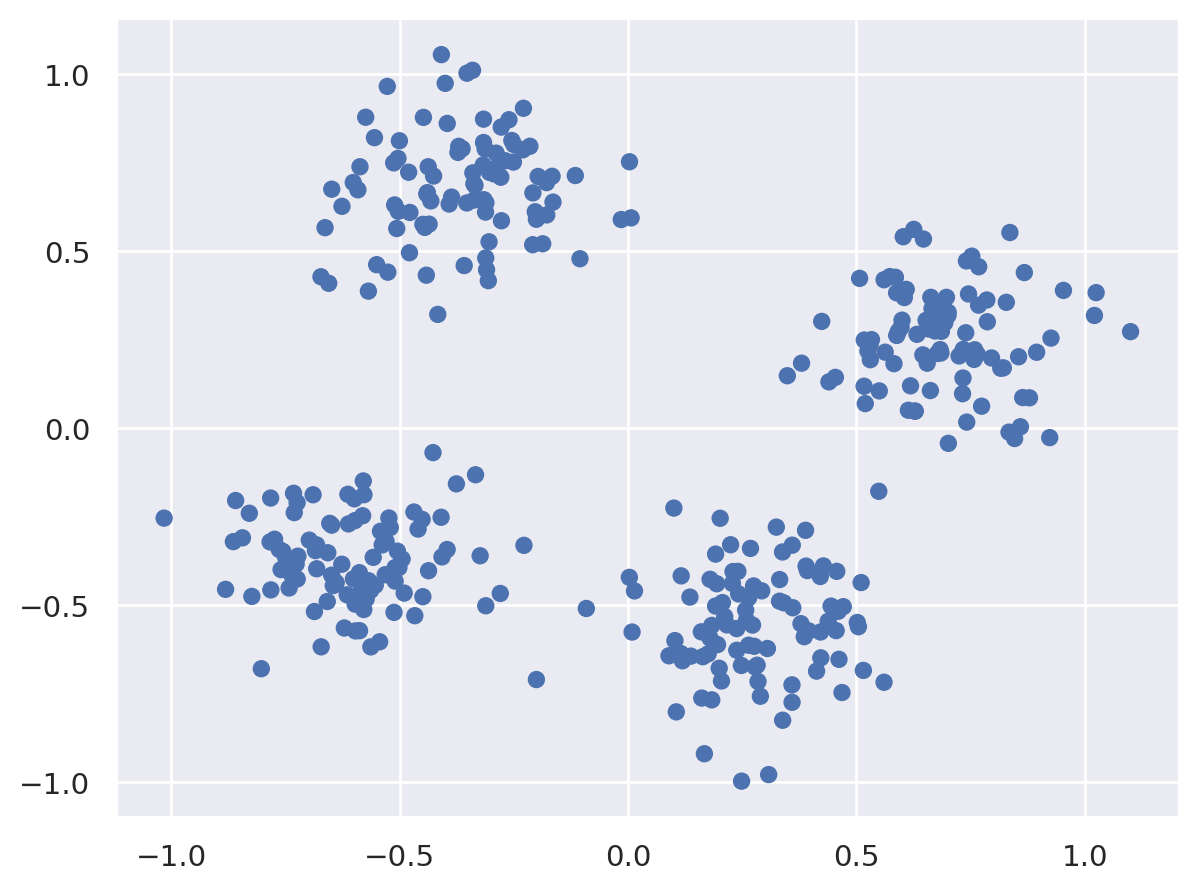

In [40]:
pca = PCA(n_components=2)
scores = pca.fit_transform(agua)
so.Plot(scores[:, 0], scores[:, 1]).add(so.Dot())

Hay 4 clusters, seguramente una de componentes principales debe tener la informacion de un cluster que no estaba presente en la otra componente principal.


#### (d)
Utilizando el método de clustering que considere apropiado, clasificar a los datos en 4 clusters utilizando solo las variables $Z_1$ y $Z_2$ y realizar nuevamente el gráfico de dispersión de $Z_1$ y $Z_2$ coloreando cada punto según el cluster al que pertenece.

**Importante**: al llamar al algoritmo de clustering utilice una matriz $W$ que contenga como columnas solo las variables $Z_1$ y $Z_2$. En todos los puntos, puede utilizar sus propias funciones y código o las funciones de los paquetes de Python.

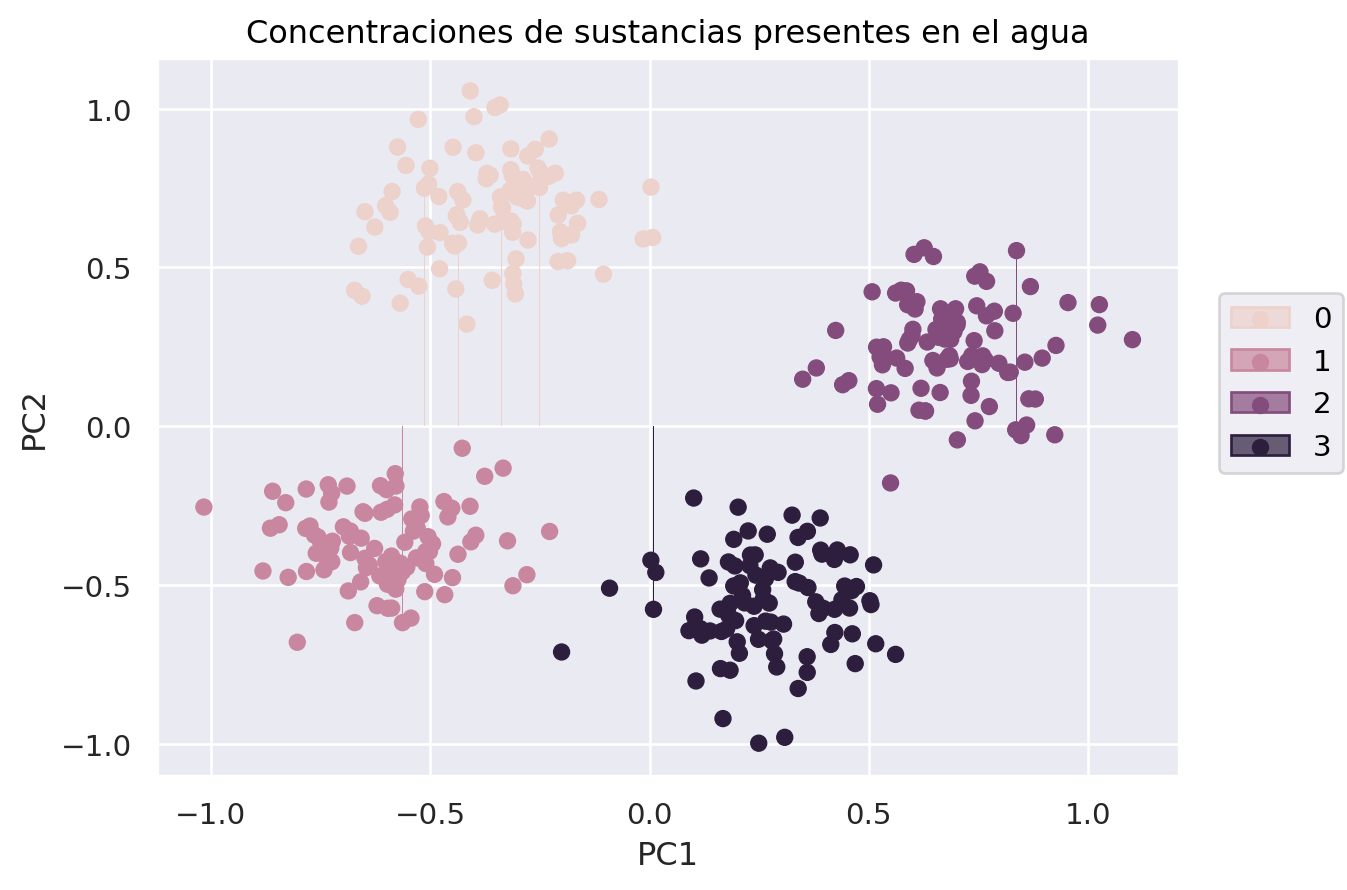

In [60]:
clustering = KMeans(n_clusters=4)
clustering.fit(scores)
(
    so.Plot(scores[:,0], scores[:,1], color=clustering.labels_)
    .add(so.Dot())
    .label(title="Concentraciones de sustancias presentes en el agua", x="PC1", y="PC2")
)